---
title: "Exploring High Dimensional Data"
title-block-banner: true
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-22"
categories: [python, datacamp, feature engineering, machine learning, dimension ]
image: "exploringDimension.png"

---

# Exploring High Dimensional Data

It will introduce us to dimensionality reduction and explain why and when it is important. It will also teach us the difference between feature selection and feature extraction, and we'll learn how to apply both techniques for data exploration. Finally, the chapter covers t-SNE, a powerful feature extraction method for analyzing high-dimensional data.

This **Exploring High Dimensional Data** is part of [Datacamp course: Hypothesis Testing in Python](https://app.datacamp.com/learn/courses/hypothesis-testing-in-python)

This is my learning experience of data science through DataCamp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
pokemon_df = pd.read_csv('dataset/pokemon_gen1.csv')
pokemon_df.head()

,HP,Attack,Defense,Generation,Name,Type,Legendary
0,45,49,49,1,Bulbasaur,Grass,False
1,60,62,63,1,Ivysaur,Grass,False
2,80,82,83,1,Venusaur,Grass,False
3,80,100,123,1,VenusaurMega Venusaur,Grass,False
4,39,52,43,1,Charmander,Fire,False


In [3]:
pokemon_df.describe()

,HP,Attack,Defense,Generation
count,160.00000,160.00000,160.000000,160.0
mean,64.61250,74.98125,70.175000,1.0
std,27.92127,29.18009,28.883533,0.0
min,10.00000,5.00000,5.000000,1.0
25%,45.00000,52.00000,50.000000,1.0
50%,60.00000,71.00000,65.000000,1.0
75%,80.00000,95.00000,85.000000,1.0
max,250.00000,155.00000,180.000000,1.0


In [4]:
pokemon_df.describe(exclude='number')

,Name,Type,Legendary
count,160,160,160
unique,160,15,1
top,Bulbasaur,Water,False
freq,1,31,160


## Introduction

### Removing features without variance
A sample of the Pokemon dataset has been loaded as `pokemon_df`. To get an idea of which features have little variance  to calculate summary as above statistics on this sample. Then adjust the code to create a smaller, easier to understand, dataset.

In [5]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense']

# Leave this list as is for now
non_number_cols = ['Name', 'Type', 'Legendary']

# Sub-select by combining the lists with chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new DataFrame
print(df_selected.head())

   HP  Attack  Defense                   Name   Type  Legendary
0  45      49       49              Bulbasaur  Grass      False
1  60      62       63                Ivysaur  Grass      False
2  80      82       83               Venusaur  Grass      False
3  80     100      123  VenusaurMega Venusaur  Grass      False
4  39      52       43             Charmander   Fire      False


In [6]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type' ]

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name   Type
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


All Pokemon in this dataset are non-legendary and from generation one so you could choose to drop those two features.

## Feature selection vs feature extraction
- Why reduce dimensionality?
    - Your dataset will:
        - be less complex
        - require less disk space
        - require less computation time
        - have lower chance of model overfitting

![feature](feature.png){#fig-feature}

### Visually detecting redundant features
Data visualization is a crucial step in any data exploration. Let's use Seaborn to explore some samples of the US Army ANSUR body measurement dataset.

In [7]:
ansur_df_1 = pd.read_csv('dataset/ansur_df_1.csv')
ansur_df_2 = pd.read_csv('dataset/ansur_df_2.csv')

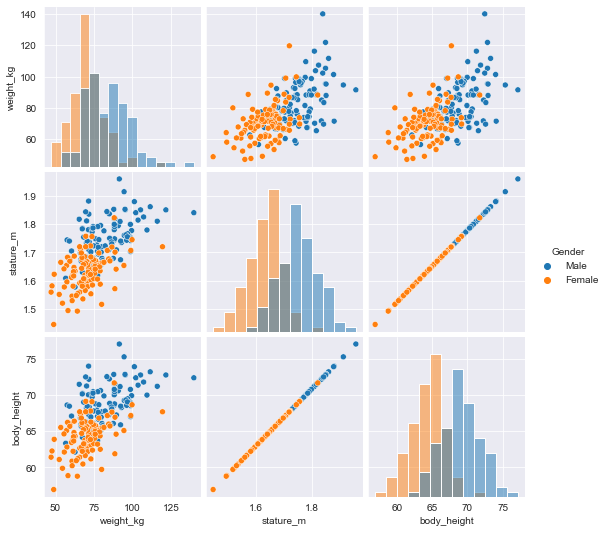

In [8]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist');

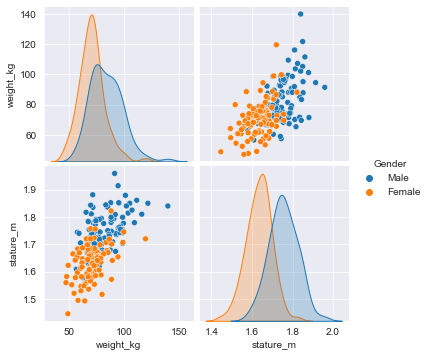

In [9]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop('body_height', axis=1)

# Creat a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender');

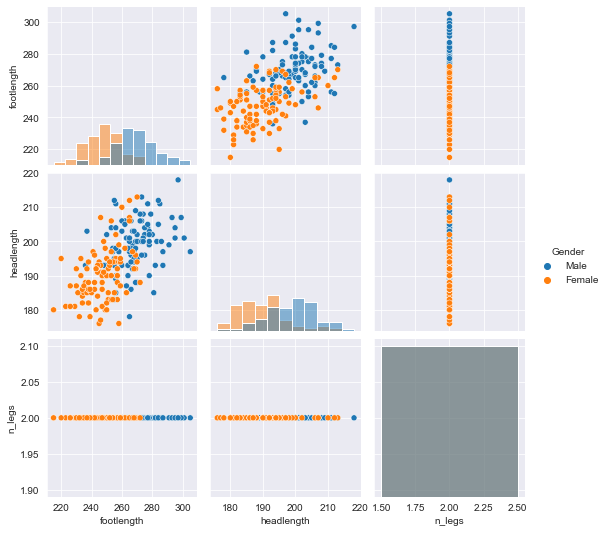

In [10]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist');

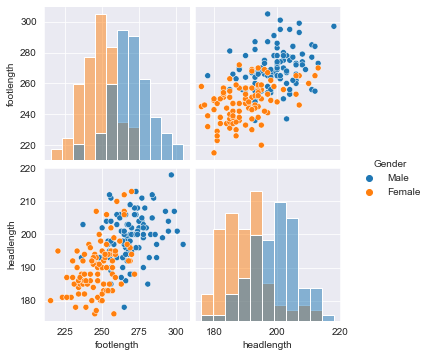

In [11]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop(['n_legs'], axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist');

the body height (inches) and stature (meters) hold the same information in a different unit + all the individuals in the second sample have two legs.

## t-SNE visualization of high-dimensional

![t-SNE-1](t-SNE-1.png){#fig-t-SNE-1}
![t-SNE-2](t-SNE-2.png){#fig-t-SNE-2}
![t-SNE-3](t-SNE-3.png){#fig-t-SNE-3}

### Fitting t-SNE to the ANSUR data
t-SNE is a great technique for visual exploration of high dimensional datasets. In this exercise, you'll apply it to the ANSUR dataset. You'll remove non-numeric columns from the pre-loaded dataset df and fit TSNE to his numeric dataset.

In [14]:
ansur_male = pd.read_csv('dataset/ANSUR_II_MALE.csv')
ansur_female = pd.read_csv('dataset/ANSUR_II_FEMALE.csv')

df = pd.concat([ansur_male, ansur_female])
df.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [15]:
from sklearn.manifold import TSNE

# Non-numeric columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class', 'Height_class']

# Drop the non-numeric columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(6068, 2)


 t-SNE reduced the more than 90 features in the dataset to just 2 which you can now plot.

### t-SNE visualisation of dimensionality
Time to look at the results of your hard work. In this exercise, you will visualize the output of t-SNE dimensionality reduction on the combined male and female Ansur dataset. You'll create 3 scatterplots of the 2 t-SNE features (`'x'` and `'y'`) which were added to the dataset `df`. In each scatterplot you'll color the points according to a different categorical variable.

In [16]:
df['x'] = tsne_features[:, 0]
df['y'] = tsne_features[:, 1]

<AxesSubplot:xlabel='x', ylabel='y'>

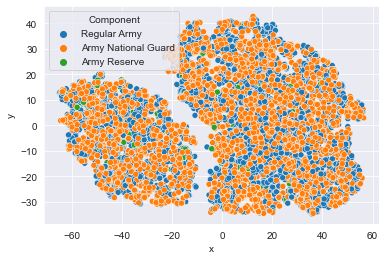

In [17]:
# Color the points according to Army Component
sns.scatterplot(x='x', y='y', hue='Component', data=df)

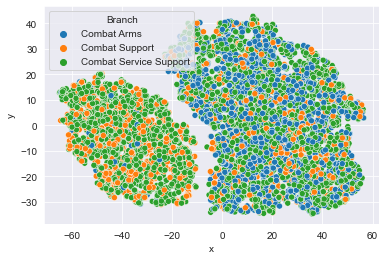

In [18]:
# Color the points by Army Branch
sns.scatterplot(x='x', y='y', hue='Branch', data=df);

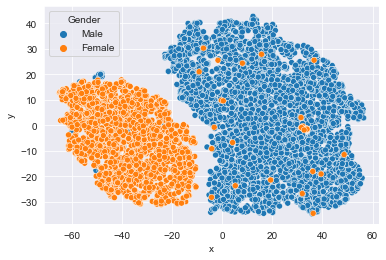

In [19]:
# Color the points by Gender
sns.scatterplot(x='x', y='y', hue='Gender', data=df);

There is a Male and a Female cluster. t-SNE found these gender differences in body shape without being told about them explicitly! From the second plot you learned there are more males in the Combat Arms Branch.